In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

np.random.seed(10)

In [2]:
file_path = '../../datasets/278k_labelled_uri.csv'
moodify_data = pd.read_csv(file_path).drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
moodify_data.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [3]:
print(moodify_data.isnull().sum())

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
uri                 0
dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
moodify_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(moodify_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
moodify_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(moodify_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

In [9]:
moodify_data

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,195000.0,0.617796,0.614,0.788894,0.069637,0.016968,0.000794,0.7530,0.520,0.522766,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,194641.0,0.645096,0.781,0.819210,0.029534,0.011847,0.009530,0.3490,0.250,0.502088,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,217573.0,0.566229,0.810,0.801008,0.090363,0.007129,0.000008,0.2410,0.247,0.694207,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,443478.0,0.530839,0.699,0.854305,0.036580,0.017871,0.000088,0.0888,0.199,0.375636,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,225862.0,0.371082,0.771,0.834392,0.109845,0.366466,0.000001,0.0965,0.163,0.473233,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,276360.0,0.785642,0.725,0.785857,0.048705,0.126506,0.010800,0.0917,0.851,0.523987,1.700680e-07,1,spotify:track:6wLr2oR8eqUG5Beleh2Crm
277934,284773.0,0.549039,0.482,0.727644,0.201036,0.085643,0.000092,0.1110,0.415,0.790020,6.812444e-07,1,spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y
277935,241307.0,0.532861,0.942,0.837829,0.037927,0.011546,0.000000,0.1880,0.495,0.607164,1.516740e-07,2,spotify:track:7FwBtcecmlpc1sLySPXeGE
277936,234333.0,0.776542,0.829,0.846013,0.032435,0.096787,0.000029,0.0970,0.962,0.484893,1.335706e-07,1,spotify:track:2olVm1lHicpveMAo4AUDRB


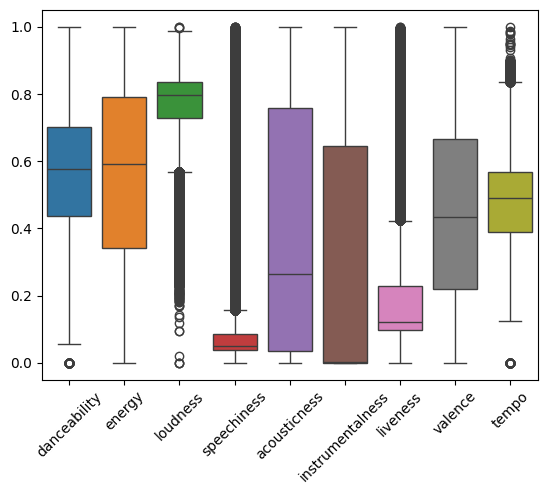

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns (assuming they've already been scaled)
numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                   'instrumentalness', 'liveness', 'valence', 'tempo']

# Create the boxplot
sns.boxplot(data=moodify_data[numeric_columns])
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [21]:
#fixing the outlier 
import numpy as np
import pandas as pd

# Function to impute outliers using IQR method
def impute_outliers_IQR(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    upper = q3 + 1.5 * IQR
    lower = q1 - 1.5 * IQR
    mean_val = column.mean()
    column = np.where(column > upper, mean_val, np.where(column < lower, mean_val, column))
    return column


column_name = moodify_data.columns

# Print initial shape of the data
print("Old Shape: ", moodify_data.shape)

# Calculate percentage of outliers and replace them with the mean
print("Percentage of Outliers:")
for i in range(len(column_name)-1):
    Q1 = moodify_data[column_name[i]].quantile(0.25)
    Q3 = moodify_data[column_name[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Find the outlier rows
    upper_array = np.where(moodify_data[column_name[i]] >= upper)[0]
    lower_array = np.where(moodify_data[column_name[i]] <= lower)[0]
    
    # Print percentage of outliers
    percentage_outliers = (len(upper_array) + len(lower_array)) / len(moodify_data) * 100
    print(f"{column_name[i]}: {percentage_outliers:.2f}%")
    
    # Replace outliers with the mean
    moodify_data[column_name[i]] = impute_outliers_IQR(moodify_data[column_name[i]])

# Print the new shape of the data
print("New Shape: ", moodify_data.shape)

Old Shape:  (277938, 13)
Percentage of Outliers:
duration (ms): 5.50%
danceability: 0.03%
energy: 0.00%
loudness: 6.53%
speechiness: 13.47%
acousticness: 0.00%
instrumentalness: 0.00%
liveness: 7.34%
valence: 0.00%
tempo: 0.27%
spec_rate: 12.28%
labels: 0.00%
New Shape:  (277938, 13)


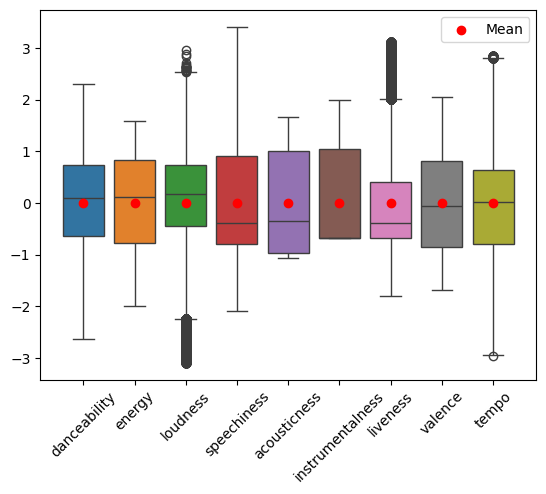

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                   'instrumentalness', 'liveness', 'valence', 'tempo']


scaler = StandardScaler()
moodify_data[numeric_columns] = scaler.fit_transform(moodify_data[numeric_columns])

# Create the boxplot
sns.boxplot(data=moodify_data[numeric_columns])
means = moodify_data[numeric_columns].mean()

plt.scatter(x=np.arange(len(means)), y=means, color='red', zorder=3, label='Mean')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [24]:
moodify_data.to_csv('../../datasets/moodify_preprocessed.csv', index=False) 